In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [10, 6.5]

import darklim
import pickle
import powerlaw

In [2]:
def get_spectra_exp(e0, tot_rate_hz, exposure_time, res=0):
    total_events = np.random.poisson(tot_rate_hz * exposure_time)
    print("Total Events: " + str(total_events))
    energies = np.random.exponential(size=int(total_events))*e0 + np.random.normal(size=int(total_events))*res
    return energies
    
def get_spectra_pwr(exponent, rate_hz_1ev, exposure_time, res=1, threshold=5):
    #dif_rate(energy) = rate_hz_1ev *  (energy/ 1 eV)^-exponent
    expected_events = rate_hz_1ev * threshold**(1 - exponent) / (exponent - 1)
    total_events = np.random.poisson(expected_events)
    #print(total_events)
    
    gaussian_smear = np.random.normal(size=int(total_events))*res
    true_energies = powerlaw.Power_Law(xmin=threshold, parameters=[exponent]).generate_random(total_events)
    energies = gaussian_smear + true_energies
    return energies[energies > threshold]


In [3]:
resolution = 1 #eV
threshold = 5*resolution #eV
energy_range = np.arange(threshold, 100, 0.5) #eV
exposure_s = 600 * 1
efficiencies = np.ones_like(energy_range)

lee_rate = 1 #Hz
lee_energy_scale = 20 #eV

dm_masses = np.geomspace(0.1, 5, num=30)

In [4]:
spectra_energy = []
e0s_arr = [10, 20, 30, 50, 100, 200]

i = 0
while i < len(e0s_arr):
    spectra_energy.append(get_spectra_exp(e0s_arr[i], lee_rate, exposure_s, res=resolution))
    i += 1
    

R0s_arr = [0.2, 0.3, 0.5, 1, 2, 5]

spectra_rate = []
i = 0
while i < len(R0s_arr):
    spectra_rate.append(get_spectra_exp(lee_energy_scale, R0s_arr[i], exposure_s, res=resolution))
    i += 1

    
res_arr = [0.1, 0.2, 0.3, 0.5, 1, 2, 3, 5]

spectra_res = []
i = 0
while i < len(res_arr):
    spectra_res.append(get_spectra_exp(lee_energy_scale, lee_rate, exposure_s, res=resolution))
    i += 1
    
    
exposure_arr = [100, 300, 1000, 3000, 10000]
    
spectra_exposure = []
i = 0
while i < len(exposure_arr):
    spectra_exposure.append(get_spectra_exp(lee_energy_scale, lee_rate, exposure_arr[i], res=resolution))
    i += 1
    


Total Events: 580
Total Events: 621
Total Events: 591
Total Events: 624
Total Events: 589
Total Events: 575
Total Events: 139
Total Events: 180
Total Events: 314
Total Events: 592
Total Events: 1187
Total Events: 2926
Total Events: 611
Total Events: 602
Total Events: 624
Total Events: 613
Total Events: 630
Total Events: 592
Total Events: 609
Total Events: 598
Total Events: 119
Total Events: 288
Total Events: 960
Total Events: 3001
Total Events: 10186


In [5]:
limits_energy = []

i = 0
while i < len(spectra_energy):
    sig, ol1, ol2 = darklim.limit.optimuminterval(spectra_energy[i]*1e-3, energy_range*1e-3, efficiencies,
                                                  dm_masses, 0.001*exposure_s/(24*60*60), res=resolution*1e-3,
                                                 verbose=True, hard_threshold=threshold*1e-3)
    limits_energy.append(sig)
    print("Done with spectrum " + str(i) + " of " + str(len(spectra_energy)))
    print(" ")
    i += 1
    

On mass 1 of 30.
On mass 2 of 30.
On mass 3 of 30.
On mass 4 of 30.
On mass 5 of 30.
On mass 6 of 30.
On mass 7 of 30.
On mass 8 of 30.
On mass 9 of 30.
On mass 10 of 30.
On mass 11 of 30.
On mass 12 of 30.
On mass 13 of 30.
On mass 14 of 30.
On mass 15 of 30.
On mass 16 of 30.
On mass 17 of 30.
On mass 18 of 30.
On mass 19 of 30.
On mass 20 of 30.
On mass 21 of 30.
On mass 22 of 30.
On mass 23 of 30.
On mass 24 of 30.
On mass 25 of 30.
On mass 26 of 30.
On mass 27 of 30.
On mass 28 of 30.
On mass 29 of 30.
On mass 30 of 30.
Done with spectrum 0 of 6
 
On mass 1 of 30.
On mass 2 of 30.
On mass 3 of 30.
On mass 4 of 30.
On mass 5 of 30.
On mass 6 of 30.
On mass 7 of 30.
On mass 8 of 30.
On mass 9 of 30.
On mass 10 of 30.
On mass 11 of 30.
On mass 12 of 30.
On mass 13 of 30.
On mass 14 of 30.
On mass 15 of 30.
On mass 16 of 30.
On mass 17 of 30.
On mass 18 of 30.
On mass 19 of 30.
On mass 20 of 30.
On mass 21 of 30.
On mass 22 of 30.
On mass 23 of 30.
On mass 24 of 30.
On mass 25 of 30.


In [6]:

with open('energy_scale_limits_2.pkl', 'wb') as f:
    pickle.dump(limits_energy, f)

In [8]:
limits_rate = []

i = 0
while i < len(spectra_rate):
    sig, ol1, ol2 = darklim.limit.optimuminterval(spectra_rate[i]*1e-3, energy_range*1e-3, efficiencies,
                                                  dm_masses, 0.001*exposure_s/(24*60*60), res=resolution*1e-3,
                                                 verbose=True, hard_threshold=threshold*1e-3)
    limits_rate.append(sig)
    print("Done with spectrum " + str(i) + " of " + str(len(spectra_rate)))
    print(" ")
    i += 1
    
with open('rate_limits_2.pkl', 'wb') as f:
    pickle.dump(limits_rate, f)

On mass 1 of 30.
On mass 2 of 30.
On mass 3 of 30.
On mass 4 of 30.
On mass 5 of 30.
On mass 6 of 30.
On mass 7 of 30.
On mass 8 of 30.
On mass 9 of 30.
On mass 10 of 30.
On mass 11 of 30.
On mass 12 of 30.
On mass 13 of 30.
On mass 14 of 30.
On mass 15 of 30.
On mass 16 of 30.
On mass 17 of 30.
On mass 18 of 30.
On mass 19 of 30.
On mass 20 of 30.
On mass 21 of 30.
On mass 22 of 30.
On mass 23 of 30.
On mass 24 of 30.
On mass 25 of 30.
On mass 26 of 30.
On mass 27 of 30.
On mass 28 of 30.
On mass 29 of 30.
On mass 30 of 30.
Done with spectrum 0 of 6
 
On mass 1 of 30.
On mass 2 of 30.
On mass 3 of 30.
On mass 4 of 30.
On mass 5 of 30.
On mass 6 of 30.
On mass 7 of 30.
On mass 8 of 30.
On mass 9 of 30.
On mass 10 of 30.
On mass 11 of 30.
On mass 12 of 30.
On mass 13 of 30.
On mass 14 of 30.
On mass 15 of 30.
On mass 16 of 30.
On mass 17 of 30.
On mass 18 of 30.
On mass 19 of 30.
On mass 20 of 30.
On mass 21 of 30.
On mass 22 of 30.
On mass 23 of 30.
On mass 24 of 30.
On mass 25 of 30.


In [9]:
limits_res = []

i = 0
while i < len(spectra_res):
    sig, ol1, ol2 = darklim.limit.optimuminterval(spectra_res[i]*1e-3, energy_range*1e-3, efficiencies,
                                                  dm_masses, 0.001*exposure_s/(24*60*60), res=res_arr[i]*1e-3,
                                                 verbose=True, hard_threshold=res_arr[i]*5e-3)
    limits_res.append(sig)
    print("Done with spectrum " + str(i) + " of " + str(len(spectra_res)))
    print(" ")
    i += 1
    
with open('resolution_limits_2.pkl', 'wb') as f:
    pickle.dump(limits_res, f)

On mass 1 of 30.
On mass 2 of 30.
On mass 3 of 30.
On mass 4 of 30.
On mass 5 of 30.
On mass 6 of 30.
On mass 7 of 30.
On mass 8 of 30.
On mass 9 of 30.
On mass 10 of 30.
On mass 11 of 30.
On mass 12 of 30.
On mass 13 of 30.
On mass 14 of 30.
On mass 15 of 30.
On mass 16 of 30.
On mass 17 of 30.
On mass 18 of 30.
On mass 19 of 30.
On mass 20 of 30.
On mass 21 of 30.
On mass 22 of 30.
On mass 23 of 30.
On mass 24 of 30.
On mass 25 of 30.
On mass 26 of 30.
On mass 27 of 30.
On mass 28 of 30.
On mass 29 of 30.
On mass 30 of 30.
Done with spectrum 0 of 8
 
On mass 1 of 30.
On mass 2 of 30.
On mass 3 of 30.
On mass 4 of 30.
On mass 5 of 30.
On mass 6 of 30.
On mass 7 of 30.
On mass 8 of 30.
On mass 9 of 30.
On mass 10 of 30.
On mass 11 of 30.
On mass 12 of 30.
On mass 13 of 30.
On mass 14 of 30.
On mass 15 of 30.
On mass 16 of 30.
On mass 17 of 30.
On mass 18 of 30.
On mass 19 of 30.
On mass 20 of 30.
On mass 21 of 30.
On mass 22 of 30.
On mass 23 of 30.
On mass 24 of 30.
On mass 25 of 30.


In [10]:
limits_exposure = []

i = 0
while i < len(spectra_exposure):
    sig, ol1, ol2 = darklim.limit.optimuminterval(spectra_exposure[i]*1e-3, energy_range*1e-3, efficiencies,
                                                  dm_masses, 0.001*exposure_arr[i]/(24*60*60), res=resolution*1e-3,
                                                 verbose=True, hard_threshold=threshold*1e-3)
    limits_exposure.append(sig)
    print("Done with spectrum " + str(i) + " of " + str(len(spectra_exposure)))
    print(" ")
    i += 1
    
with open('exosure_limits_2.pkl', 'wb') as f:
    pickle.dump(limits_exposure, f)

On mass 1 of 30.
On mass 2 of 30.
On mass 3 of 30.
On mass 4 of 30.
On mass 5 of 30.
On mass 6 of 30.
On mass 7 of 30.
On mass 8 of 30.
On mass 9 of 30.
On mass 10 of 30.
On mass 11 of 30.
On mass 12 of 30.
On mass 13 of 30.
On mass 14 of 30.
On mass 15 of 30.
On mass 16 of 30.
On mass 17 of 30.
On mass 18 of 30.
On mass 19 of 30.
On mass 20 of 30.
On mass 21 of 30.
On mass 22 of 30.
On mass 23 of 30.
On mass 24 of 30.
On mass 25 of 30.
On mass 26 of 30.
On mass 27 of 30.
On mass 28 of 30.
On mass 29 of 30.
On mass 30 of 30.
Done with spectrum 0 of 5
 
On mass 1 of 30.
On mass 2 of 30.
On mass 3 of 30.
On mass 4 of 30.
On mass 5 of 30.
On mass 6 of 30.
On mass 7 of 30.
On mass 8 of 30.
On mass 9 of 30.
On mass 10 of 30.
On mass 11 of 30.
On mass 12 of 30.
On mass 13 of 30.
On mass 14 of 30.
On mass 15 of 30.
On mass 16 of 30.
On mass 17 of 30.
On mass 18 of 30.
On mass 19 of 30.
On mass 20 of 30.
On mass 21 of 30.
On mass 22 of 30.
On mass 23 of 30.
On mass 24 of 30.
On mass 25 of 30.


findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


Total Events: 1198887
Total Events: 1199812
Total Events: 1199195
Total Events: 1200013
Total Events: 1197740
Total Events: 1199210
Total Events: 12067
Total Events: 17942
Total Events: 29843
Total Events: 60330
Total Events: 119900
Total Events: 299826


findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


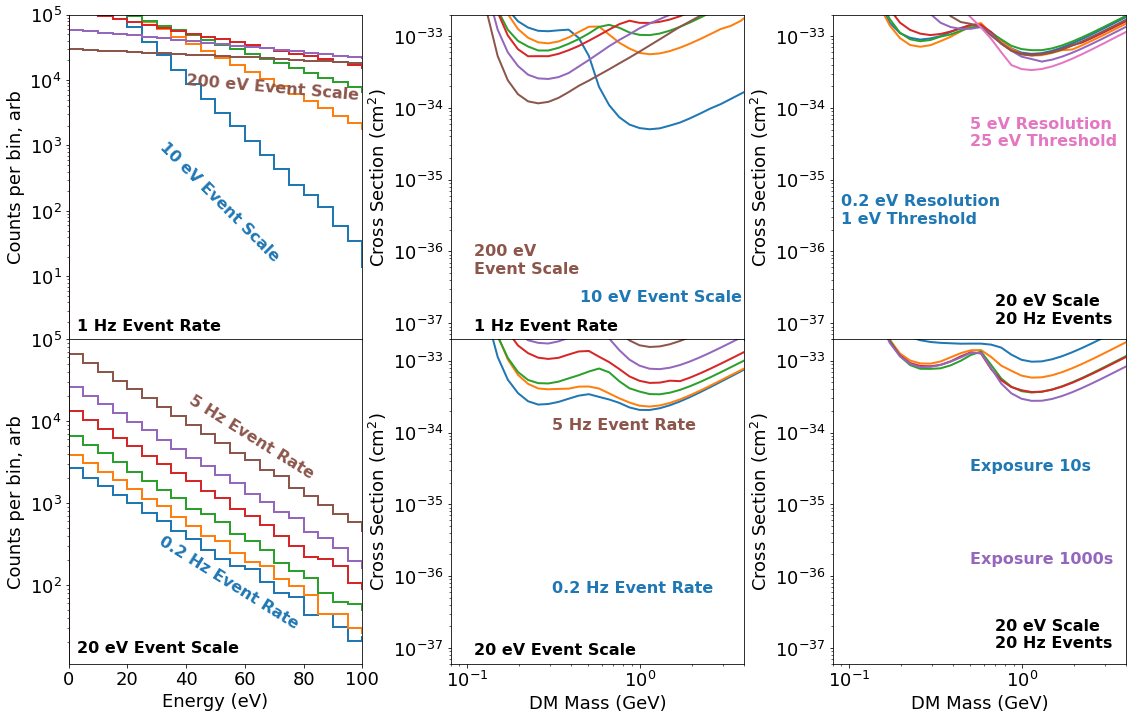

In [11]:
font = {'family': 'normal',
       'weight': 'normal',
       'size': 18}
mpl.rc('font', **font)

fig, axs = plt.subplots(2,3, figsize=(16, 10))
fig.tight_layout()
fig.subplots_adjust(hspace=0, wspace = 0.3)

bin_width = 5 #eV
bins = np.arange(0, 110, bin_width)

i = 0
while i < len(spectra_energy):
    axs[0,0].hist(get_spectra_exp(e0s_arr[i], 20, exposure_s*100), bins=bins, histtype = 'step',
                  label = "10 Hz Rate, " + str(e0s_arr[i]) + " eV scale", linewidth = 2.0)
    #axs[0,0].plot(bins, 20/exposure_s * np.exp(-bins/e0s_arr[i]),
    #              label = "10 Hz Rate, " + str(e0s_arr[i]) + " eV scale", linewidth = 2.0)
    i += 1
axs[0,0].set_yscale('log')
axs[0,0].set_xticks([])
#axs[0,0].legend()
#axs[0,0].set_xlabel("Energy (eV)")
#axs[0,0].set_ylabel("Counts per " + str(bin_width) + " eV")
axs[0,0].set_ylabel("Counts per bin, arb")
axs[0,0].text(3, 1.5, "1 Hz Event Rate", fontweight='bold', fontsize=16)
axs[0,0].text(30, 17, str(e0s_arr[0]) + " eV Event Scale", color = 'C0', fontweight='bold', fontsize=16,
              rotation = 315)
axs[0,0].text(40, 5000, str(e0s_arr[-1]) + " eV Event Scale", color = 'C' + str(len(e0s_arr) - 1),
              fontweight='bold', fontsize=16, rotation = 355)
axs[0,0].set_xlim(0, 100)
axs[0,0].set_ylim(1.1, 1e5)

i = 0
while i < len(spectra_rate):
    axs[1,0].hist(get_spectra_exp(20, R0s_arr[i], exposure_s*100), bins=bins, histtype = 'step',
                  label =str(R0s_arr[i]) + " Hz Rate, " + str(20) + " eV scale", linewidth = 2.0)
    #axs[1,0].plot(bins, R0s_arr[i]/exposure_s * np.exp(-bins/20),
    #              label =str(R0s_arr[i]) + " Hz Rate, " + str(20) + " eV scale")
    i += 1
axs[1,0].set_yscale('log')
#axs[1,0].legend()
axs[1,0].set_xlabel("Energy (eV)")
#axs[1,0].set_ylabel("Counts per " + str(bin_width) + " eV")
axs[1,0].set_ylabel("Counts per bin, arb")
#axs[1,0].sharex(axs[0,0])
axs[1,0].text(3, 15, "20 eV Event Scale", fontweight='bold', fontsize=16)
axs[1,0].text(30, 30, str(R0s_arr[0]) + " Hz Event Rate", color = 'C0', fontweight='bold', fontsize=16,
              rotation = 328)
axs[1,0].text(40, 2000, str(R0s_arr[-1]) + " Hz Event Rate", color = 'C' + str(len(R0s_arr) - 1),
              fontweight='bold', fontsize=16, rotation = 328)
axs[1,0].set_xlim(0, 100)
axs[1,0].set_ylim(11, 1e5)



i = 0
while i < len(limits_energy):
    axs[0,1].plot(dm_masses, limits_energy[i], linewidth = 2.0,
                  label = "10 Hz Rate, " + str(e0s_arr[i]) + " eV scale" )
    i += 1
axs[0,1].set_xscale('log')
axs[0,1].set_yscale('log')
axs[0,1].set_xticks([])
#axs[0,1].legend(loc=0)
axs[0,1].set_xlabel("DM Mass (GeV)")
axs[0,1].set_ylabel(r"Cross Section (cm$^2$)")
axs[0,1].text(0.11, 0.8e-37, "1 Hz Event Rate", fontweight='bold', fontsize=16)
axs[0,1].text(0.45, 2e-37, str(e0s_arr[0]) + " eV Event Scale", color = 'C0', fontweight='bold', fontsize=16,
              rotation = 0)
axs[0,1].text(0.11, 0.5e-36, str(e0s_arr[-1]) + " eV\nEvent Scale", color = 'C' + str(len(e0s_arr) - 1),
              fontweight='bold', fontsize=16, rotation = 0)
axs[0,1].set_ylim(0.6e-37, 0.2e-32)
axs[0,1].set_xlim(0.8e-1, 4)



i = 0
while i < len(limits_rate):
    axs[1,1].plot(dm_masses, limits_rate[i], linewidth = 2.0, 
                  label =str(R0s_arr[i]) + " Hz Rate, " + str(20) + " eV scale")
    i += 1
axs[1,1].set_xscale('log')
axs[1,1].set_yscale('log')
#axs[1,1].legend(loc=0)
axs[1,1].set_xlabel("DM Mass (GeV)")
axs[1,1].set_ylabel(r"Cross Section (cm$^2$)")
axs[1,1].text(0.11, 0.8e-37, "20 eV Event Scale", fontweight='bold', fontsize=16)
axs[1,1].text(0.31, 6e-37, str(R0s_arr[0]) + " Hz Event Rate", color = 'C0', fontweight='bold', fontsize=16,
              rotation = 0)
axs[1,1].text(0.31, 1.1e-34, str(R0s_arr[-1]) + " Hz Event Rate", color = 'C' + str(len(e0s_arr) - 1),
              fontweight='bold', fontsize=16, rotation = 0)
axs[1,1].set_ylim(0.6e-37, 0.2e-32)
axs[1,1].set_xlim(0.8e-1, 4)




i = 1
while i < len(limits_res):
    axs[0,2].plot(dm_masses, limits_res[i], linewidth = 2.0,
                  label = "Resolution " + str(res_arr[i]) + " eV")
    i += 1
axs[0,2].set_xscale('log')
axs[0,2].set_yscale('log')
axs[0,2].set_xticks([])
#axs[0,2].legend(loc = 3)
axs[0,2].set_xlabel("DM Mass (GeV)")
axs[0,2].set_ylabel(r"Cross Section (cm$^2$)")
axs[0,2].text(0.7, 1e-37, "20 eV Scale\n20 Hz Events", fontweight='bold', fontsize=16)
axs[0,2].text(0.09, 2.5e-36, "0.2 eV Resolution\n1 eV Threshold", 
              fontweight='bold', fontsize=16, color = 'C0')
axs[0,2].text(0.5, 3e-35, "5 eV Resolution\n25 eV Threshold", 
              fontweight='bold', fontsize=16, color = 'C' + str(len(limits_res) - 2))
axs[0,2].set_ylim(0.6e-37, 2e-33)
axs[0,2].set_xlim(0.8e-1, 4)



i = 0
while i < len(limits_exposure):
    axs[1,2].plot(dm_masses, limits_exposure[i], linewidth = 2.0,
                  label = "Exposure " + str(exposure_arr[i]) + " s")
    i += 1
axs[1,2].set_xscale('log')
axs[1,2].set_yscale('log')
#axs[1,2].legend(loc = 3)
axs[1,2].set_xlabel("DM Mass (GeV)")
axs[1,2].set_ylabel(r"Cross Section (cm$^2$)")
axs[1,2].text(0.7, 1e-37, "20 eV Scale\n20 Hz Events", fontweight='bold', fontsize=16)
axs[1,2].text(0.5, 3e-35, "Exposure 10s", 
              fontweight='bold', fontsize=16, color = 'C0')
axs[1,2].text(0.5, 1.5e-36, "Exposure 1000s", 
              fontweight='bold', fontsize=16, color = 'C' + str(len(limits_exposure) -1))
axs[1,2].set_ylim(0.6e-37, 2e-33)
axs[1,2].set_xlim(0.8e-1, 4)
    
    
plt.savefig("excess_review_limits_sim_2.pdf", bbox_inches='tight')
    
plt.show()

In [13]:
sim_dict = {'creator':'Roger K Romani', 'date' : '12/15/24'}

In [12]:
with open('energy_scale_limits_2.pkl', 'rb') as f:
    limits_energy = pickle.load(f)
    
with open('rate_limits_2.pkl', 'rb') as f:
    limits_rate = pickle.load(f)
    
with open('resolution_limits_2.pkl', 'rb') as f:
    limits_res = pickle.load(f)
    
with open('exosure_limits_2.pkl', 'rb') as f:
    limits_exposure = pickle.load(f)

In [17]:
#key is energy scale in eV
vs_energy_scale_events_dict = {}
i = 0
while i < len(spectra_energy):
    vs_energy_scale_events_dict[str(e0s_arr[i])] = []#get_spectra_exp(e0s_arr[i], 20, exposure_s*100)
    i += 1
vs_energy_scale_events_dict['note'] = 'key is energy scale of exponentially distributed events in eV'
vs_energy_scale_events_dict['rate'] = '1 Hz'
    
sim_dict['vs_energy_scale_events_dict'] = vs_energy_scale_events_dict

In [18]:
#key is rate in Hz, arb scaling
vs_rate_events_dict = {}
i = 0
while i < len(spectra_rate):
    vs_rate_events_dict[str(R0s_arr[i])] = []#get_spectra_exp(20, R0s_arr[i], exposure_s*100)
    i += 1
vs_rate_events_dict['note'] = 'key is rate of exponentially distributed events in Hz'
vs_rate_events_dict['energy_scale'] = '20 eV'
    
sim_dict['vs_rate_events_dict'] = vs_rate_events_dict

In [19]:
#key is energy scale in eV
vs_energy_scale_limits_dict = {}
i = 0
while i < len(spectra_energy):
    vs_energy_scale_limits_dict[str(e0s_arr[i])] = limits_energy[i]
    i += 1
    
vs_energy_scale_limits_dict['note'] = 'key is energy scale of exponentially distributed events in eV, 20 Hz event rate, mass is in GeV, limit is in cm^2'
vs_energy_scale_limits_dict['detector_properties'] = '1 g Si detector with 5 eV threshold, 1 eV resolution, exposure 60s'
vs_energy_scale_limits_dict['rate'] = '1 Hz'
vs_energy_scale_limits_dict['exposure_seconds'] = exposure_s

vs_energy_scale_limits_dict['masses_GeV'] = dm_masses

sim_dict['vs_energy_scale_limits_dict'] = vs_energy_scale_limits_dict

In [20]:
#key is rate in Hz
vs_rate_limits_dict = {}
i = 0
while i < len(spectra_rate):
    vs_rate_limits_dict[str(R0s_arr[i])] = limits_rate[i]
    i += 1
    
vs_rate_limits_dict['note'] = 'key is energy scale of exponentially distributed events in eV, 20 eV event scale, mass is in GeV, limit is in cm^2'
vs_rate_limits_dict['detector_properties'] = '1 g Si detector with 5 eV threshold, 1 eV resolution, exposure 60s'
vs_rate_limits_dict['energy_scale'] = '20 eV'
vs_rate_limits_dict['exposure_seconds'] = exposure_s

vs_rate_limits_dict['masses_GeV'] = dm_masses

sim_dict['vs_rate_limits_dict'] = vs_rate_limits_dict

In [21]:
vs_resolution_limits_dict = {}
i = 1
while i < len(limits_res):
    vs_resolution_limits_dict[str(res_arr[i])] = limits_res[i]
    i += 1
    
vs_resolution_limits_dict['note'] = 'key is energy resolution in eV, threshold is 5x resolution, 20 eV event scale, 20 Hz event rate, mass is in GeV, limit is in cm^2'
vs_resolution_limits_dict['detector_properties'] = '1 g Si detector, exposure 60s'
vs_resolution_limits_dict['energy_scale'] = '20 eV'
vs_resolution_limits_dict['rate'] = '1 Hz'
vs_resolution_limits_dict['exposure_seconds'] = exposure_s

vs_resolution_limits_dict['masses_GeV'] = dm_masses

sim_dict['vs_resolution_limits_dict'] = vs_resolution_limits_dict

In [22]:
vs_exposure_limits_dict = {}
i = 1
while i < len(limits_exposure):
    vs_exposure_limits_dict[str(exposure_arr[i])] = limits_exposure[i]
    i += 1
    
vs_exposure_limits_dict['note'] = 'key is energy resolution in eV, threshold is 5x resolution, 20 eV event scale, 20 Hz event rate, mass is in GeV, limit is in cm^2'
vs_exposure_limits_dict['detector_properties'] = '1 g Si detector, resolution 1 eV, threshold 5 eV'
vs_exposure_limits_dict['energy_scale'] = '20 eV'
vs_exposure_limits_dict['rate'] = '1 Hz'

vs_exposure_limits_dict['masses_GeV'] = dm_masses

sim_dict['vs_exposure_limits_dict'] = vs_exposure_limits_dict

In [31]:
print(sim_dict)

{'creator': 'Roger K Romani', 'date': '10/30/24', 'vs_energy_scale_limits_dict': {'10': array([1.15476099e-27, 1.64516647e-31, 1.80975038e-32, 5.29904562e-33,
       2.54194847e-33, 1.64608471e-33, 1.31568977e-33, 1.21955047e-33,
       1.21453650e-33, 1.22452155e-33, 1.28862504e-33, 9.12209236e-34,
       4.91099223e-34, 3.09643466e-34, 1.87284344e-34, 1.25893303e-34,
       9.93325596e-35, 8.86045966e-35, 8.59800727e-35, 8.88805851e-35,
       9.64190241e-35, 1.07638574e-34, 1.23140281e-34, 1.41098435e-34,
       1.64884012e-34, 1.93848028e-34, 2.28640840e-34, 2.69643148e-34,
       3.15088766e-34, 3.71601115e-34]), '20': array([8.42677769e-28, 1.36558730e-31, 1.67079554e-32, 5.14382612e-33,
       2.30848895e-33, 1.42393125e-33, 1.05620559e-33, 8.93323985e-34,
       8.53841031e-34, 8.99963306e-34, 1.00695092e-33, 1.18653198e-33,
       1.40150636e-33, 1.45116850e-33, 9.89353475e-34, 7.05669591e-34,
       5.72412409e-34, 5.07820420e-34, 4.91130031e-34, 5.07932642e-34,
       5.5020

In [23]:
import pickle

with open('simulation_dict_2.pkl', 'wb') as f:
    pickle.dump(sim_dict, f)

In [4]:
resolution = 1 #eV
threshold = 5*resolution #eV
energy_range = np.arange(threshold, 100, 0.5) #eV
exposure_s = 60000 * 1
efficiencies = np.ones_like(energy_range)

lee_rate_1ev = 1e4 #Hz
lee_exponent = 5

dm_masses = np.geomspace(0.1, 5, num=30)

In [39]:
spectra_exps = []
exps_arr = [3, 3.5, 4, 4.5, 5, 5.5, 6]
exp_rates = [3e4, 1e5, 3e5, 1e6, 3e6, 1e7, 3e7]
"""i = 0
while i < len(exps_arr):
    expected_events = lee_rate_1ev * 10**(1 - exps_arr[i]) / (exps_arr[i] - 1)
    exp_rates.append(lee_rate_1ev/expected_events)
    i += 1"""
print(exp_rates)

i = 0
while i < len(exps_arr):
    spectra_exps.append(get_spectra_pwr(exps_arr[i], exp_rates[i]*10, exposure_s,
                                          res=resolution, threshold=threshold))
    i += 1
    
#print(spectra_exps)

rate_1evs_arr = [1e5, 3e5, 1e6, 3e6, 10e6]

spectra_rate_1ev = []
i = 0
while i < len(rate_1evs_arr):
    spectra_rate_1ev.append(get_spectra_pwr(lee_exponent, rate_1evs_arr[i]*10, exposure_s,
                                          res=resolution, threshold=threshold))
    i += 1
    
#print(spectra_rate_1ev)

[30000.0, 100000.0, 300000.0, 1000000.0, 3000000.0, 10000000.0, 30000000.0]


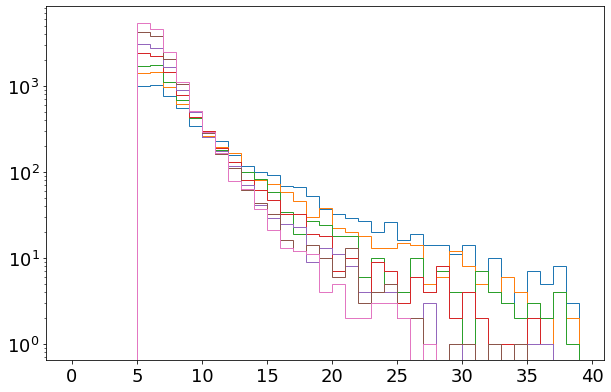

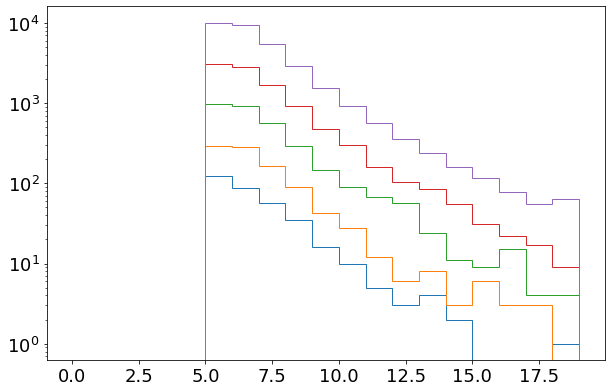

In [40]:
bins = np.arange(0, 40, 1)
i = 0
while i < len(exps_arr):
    plt.hist(spectra_exps[i], bins=bins, histtype ='step')
    i += 1
    
plt.yscale('log')
plt.show()
  
bins = np.arange(0, 20, 1)
i = 0
while i < len(rate_1evs_arr):
    plt.hist(spectra_rate_1ev[i], bins=bins, histtype ='step')
    i += 1
    
plt.yscale('log')
plt.show()

In [41]:
limits_exps = []

i = 0
while i < len(spectra_exps):
    sig, ol1, ol2 = darklim.limit.optimuminterval(spectra_exps[i]*1e-3, energy_range*1e-3, efficiencies,
                                                  dm_masses, 0.001*exposure_s/(24*60*60), res=resolution*1e-3,
                                                 verbose=True, hard_threshold=threshold*1e-3)
    limits_exps.append(sig)
    print("Done with spectrum " + str(i) + " of " + str(len(spectra_exps)))
    print(" ")
    i += 1

On mass 1 of 30.
On mass 2 of 30.
On mass 3 of 30.
On mass 4 of 30.
On mass 5 of 30.
On mass 6 of 30.
On mass 7 of 30.
On mass 8 of 30.
On mass 9 of 30.
On mass 10 of 30.
On mass 11 of 30.
On mass 12 of 30.
On mass 13 of 30.
On mass 14 of 30.
On mass 15 of 30.
On mass 16 of 30.
On mass 17 of 30.
On mass 18 of 30.
On mass 19 of 30.
On mass 20 of 30.
On mass 21 of 30.
On mass 22 of 30.
On mass 23 of 30.
On mass 24 of 30.
On mass 25 of 30.
On mass 26 of 30.
On mass 27 of 30.
On mass 28 of 30.
On mass 29 of 30.
On mass 30 of 30.
Done with spectrum 0 of 7
 
On mass 1 of 30.
On mass 2 of 30.
On mass 3 of 30.
On mass 4 of 30.
On mass 5 of 30.
On mass 6 of 30.
On mass 7 of 30.
On mass 8 of 30.
On mass 9 of 30.
On mass 10 of 30.
On mass 11 of 30.
On mass 12 of 30.
On mass 13 of 30.
On mass 14 of 30.
On mass 15 of 30.
On mass 16 of 30.
On mass 17 of 30.
On mass 18 of 30.
On mass 19 of 30.
On mass 20 of 30.
On mass 21 of 30.
On mass 22 of 30.
On mass 23 of 30.
On mass 24 of 30.
On mass 25 of 30.


In [42]:
limits_rates_1ev = []

i = 0
while i < len(spectra_rate_1ev):
    sig, ol1, ol2 = darklim.limit.optimuminterval(spectra_rate_1ev[i]*1e-3, energy_range*1e-3, efficiencies,
                                                  dm_masses, 0.001*exposure_s/(24*60*60), res=resolution*1e-3,
                                                 verbose=True, hard_threshold=threshold*1e-3)
    limits_rates_1ev.append(sig)
    print("Done with spectrum " + str(i) + " of " + str(len(spectra_exps)))
    print(" ")
    i += 1

On mass 1 of 30.
On mass 2 of 30.
On mass 3 of 30.
On mass 4 of 30.
On mass 5 of 30.
On mass 6 of 30.
On mass 7 of 30.
On mass 8 of 30.
On mass 9 of 30.
On mass 10 of 30.
On mass 11 of 30.
On mass 12 of 30.
On mass 13 of 30.
On mass 14 of 30.
On mass 15 of 30.
On mass 16 of 30.
On mass 17 of 30.
On mass 18 of 30.
On mass 19 of 30.
On mass 20 of 30.
On mass 21 of 30.
On mass 22 of 30.
On mass 23 of 30.
On mass 24 of 30.
On mass 25 of 30.
On mass 26 of 30.
On mass 27 of 30.
On mass 28 of 30.
On mass 29 of 30.
On mass 30 of 30.
Done with spectrum 0 of 7
 
On mass 1 of 30.
On mass 2 of 30.
On mass 3 of 30.
On mass 4 of 30.
On mass 5 of 30.
On mass 6 of 30.
On mass 7 of 30.
On mass 8 of 30.
On mass 9 of 30.
On mass 10 of 30.
On mass 11 of 30.
On mass 12 of 30.
On mass 13 of 30.
On mass 14 of 30.
On mass 15 of 30.
On mass 16 of 30.
On mass 17 of 30.
On mass 18 of 30.
On mass 19 of 30.
On mass 20 of 30.
On mass 21 of 30.
On mass 22 of 30.
On mass 23 of 30.
On mass 24 of 30.
On mass 25 of 30.


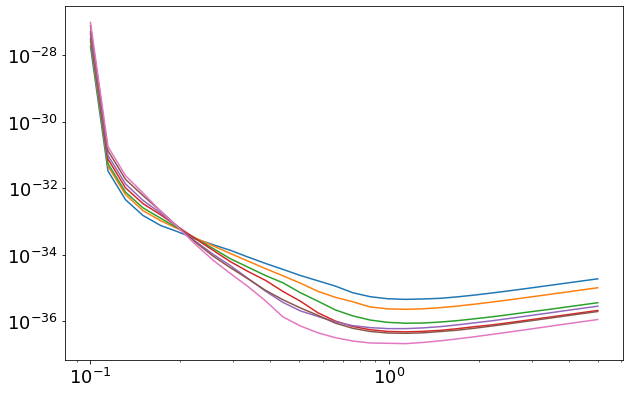

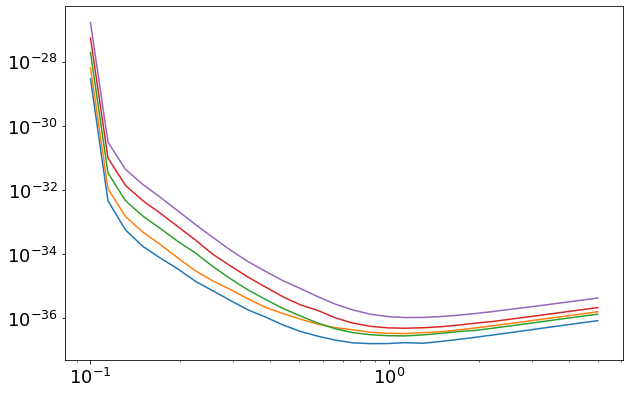

In [43]:
i = 0
while i < len(limits_exps):
    plt.plot(dm_masses, limits_exps[i])
    i += 1
plt.yscale('log')
plt.xscale('log')
plt.show()

i = 0
while i < len(limits_rates_1ev):
    plt.plot(dm_masses, limits_rates_1ev[i])
    i += 1
plt.yscale('log')
plt.xscale('log')
plt.show()

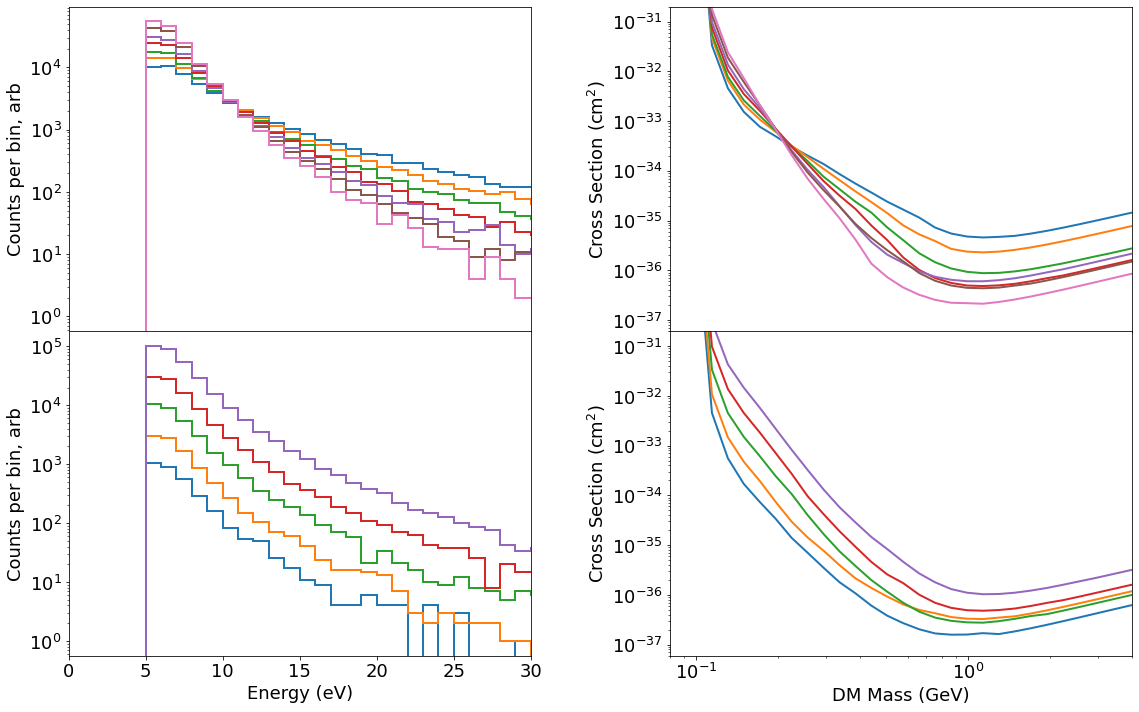

In [50]:
font = {'family': 'normal',
       'weight': 'normal',
       'size': 18}
mpl.rc('font', **font)

fig, axs = plt.subplots(2,2, figsize=(16, 10))
fig.tight_layout()
fig.subplots_adjust(hspace=0, wspace = 0.3)

bin_width = 1 #eV
bins = np.arange(0, 35, bin_width)

i = 0
while i < len(exps_arr):
    axs[0,0].hist(get_spectra_pwr(exps_arr[i], exp_rates[i]*100, exposure_s,
                                          res=resolution, threshold=threshold), bins=bins, histtype = 'step',
                  linewidth = 2.0)
    i += 1
axs[0,0].set_yscale('log')
axs[0,0].set_xticks([])
axs[0,0].set_ylabel("Counts per bin, arb")
#axs[0,0].text(3, 1.5, "1 Hz Event Rate", fontweight='bold', fontsize=16)
#axs[0,0].text(30, 17, str(e0s_arr[0]) + " eV Event Scale", color = 'C0', fontweight='bold', fontsize=16,
#              rotation = 315)
#axs[0,0].text(40, 5000, str(e0s_arr[-1]) + " eV Event Scale", color = 'C' + str(len(e0s_arr) - 1),
#              fontweight='bold', fontsize=16, rotation = 355)
axs[0,0].set_xlim(0, 30)
#axs[0,0].set_ylim(1.1, 1e5)

i = 0
while i < len(rate_1evs_arr):
    axs[1,0].hist(get_spectra_pwr(lee_exponent, rate_1evs_arr[i]*100, exposure_s,
                                          res=resolution, threshold=threshold), bins=bins, histtype = 'step',
                  linewidth = 2.0)
    i += 1
axs[1,0].set_yscale('log')
#axs[1,0].legend()
axs[1,0].set_xlabel("Energy (eV)")
#axs[1,0].set_ylabel("Counts per " + str(bin_width) + " eV")
axs[1,0].set_ylabel("Counts per bin, arb")
#axs[1,0].sharex(axs[0,0])
#axs[1,0].text(3, 15, "20 eV Event Scale", fontweight='bold', fontsize=16)
#axs[1,0].text(30, 30, str(R0s_arr[0]) + " Hz Event Rate", color = 'C0', fontweight='bold', fontsize=16,
#              rotation = 328)
#axs[1,0].text(40, 2000, str(R0s_arr[-1]) + " Hz Event Rate", color = 'C' + str(len(R0s_arr) - 1),
#              fontweight='bold', fontsize=16, rotation = 328)
axs[1,0].set_xlim(0, 30)
#axs[1,0].set_ylim(11, 1e5)



i = 0
while i < len(limits_exps):
    axs[0,1].plot(dm_masses, limits_exps[i], linewidth = 2.0)
    i += 1
axs[0,1].set_xscale('log')
axs[0,1].set_yscale('log')
axs[0,1].set_xticks([])
#axs[0,1].legend(loc=0)
axs[0,1].set_xlabel("DM Mass (GeV)")
axs[0,1].set_ylabel(r"Cross Section (cm$^2$)")
#axs[0,1].text(0.11, 0.8e-37, "1 Hz Event Rate", fontweight='bold', fontsize=16)
#axs[0,1].text(0.45, 2e-37, str(e0s_arr[0]) + " eV Event Scale", color = 'C0', fontweight='bold', fontsize=16,
#              rotation = 0)
#axs[0,1].text(0.11, 0.5e-36, str(e0s_arr[-1]) + " eV\nEvent Scale", color = 'C' + str(len(e0s_arr) - 1),
#              fontweight='bold', fontsize=16, rotation = 0)
axs[0,1].set_ylim(0.6e-37, 0.2e-30)
axs[0,1].set_xlim(0.8e-1, 4)



i = 0
while i < len(limits_rates_1ev):
    axs[1,1].plot(dm_masses, limits_rates_1ev[i], linewidth = 2.0)
    i += 1
axs[1,1].set_xscale('log')
axs[1,1].set_yscale('log')
#axs[1,1].legend(loc=0)
axs[1,1].set_xlabel("DM Mass (GeV)")
axs[1,1].set_ylabel(r"Cross Section (cm$^2$)")
#axs[1,1].text(0.11, 0.8e-37, "20 eV Event Scale", fontweight='bold', fontsize=16)
#axs[1,1].text(0.31, 6e-37, str(R0s_arr[0]) + " Hz Event Rate", color = 'C0', fontweight='bold', fontsize=16,
#              rotation = 0)
#axs[1,1].text(0.31, 1.1e-34, str(R0s_arr[-1]) + " Hz Event Rate", color = 'C' + str(len(e0s_arr) - 1),
#              fontweight='bold', fontsize=16, rotation = 0)
axs[1,1].set_ylim(0.6e-37, 0.2e-30)
axs[1,1].set_xlim(0.8e-1, 4)

#fig.suptitle("Power Law Spectra", fontsize=18)
    
    
#plt.savefig("excess_review_limits_sim_2.pdf", bbox_inches='tight')
    
plt.show()